# Промежуточная аттестация по сетям искусcтвенных нейронов.
## Задание

**Ваша задача - создать классификатор изображений с помощью Keras и сверточных нейронных сетей для набора данных Fashion MNIST. Этот набор данных включает 10 меток с разными типами одежды с изображениями 28 на 28 * в оттенках серого *. Имеется обучающий набор из 60 000 изображений и 10 000 тестовых изображений.**

Описание классов

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

## Данные

**Загружаем данные**

In [1]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

## Визаулизация датасета

**Используйте matplotlib чтобы показать пример картинки.**

In [2]:
import matplotlib.pyplot as plt

%matplotlib inline

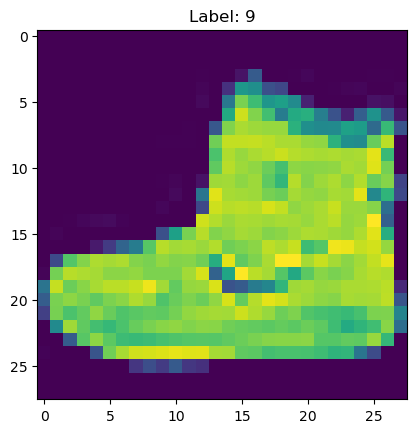

In [3]:
image_index = 0

plt.imshow(x_train[image_index])
plt.title(f'Label: {y_train[image_index]}')
plt.show()

## Предобработка

**Нормализуйте данные X_train и X_test **

Для нормализации данных MNIST разделим значения пикселей на 255, так как каждый пиксель представлен в диапазоне от 0 до 255. Это приведет значения пикселей к диапазону от 0 до 1

In [4]:
x_train_normalized = x_train / 255.0
x_test_normalized = x_test / 255.0

**Измените форму массивов X_train и X_test так, чтобы они стали 4-мерными**
batch_size x channels x H x W

In [5]:
import numpy as np

In [6]:
batch_size, H, W = x_train_normalized.shape[0], x_train_normalized.shape[1], x_train_normalized.shape[2]
channels = 1  # У нас есть только один канал для черно-белых изображений

# Изменяем форму массивов
x_train_reshaped = x_train_normalized.reshape(batch_size, channels, H, W)
x_test_reshaped = x_test_normalized.reshape(x_test_normalized.shape[0], channels, H, W)

**Преобразуйте  y_train и y_test в one_hot представления **

In [7]:
from keras.utils import to_categorical

# Преобразование y_train и y_test в one-hot представления
num_classes = 10  # Для MNIST, так как у нас 10 классов (цифры от 0 до 9)
y_train_one_hot = to_categorical(y_train, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)

## Создайте модель

**Примерная структура модели. При выполнении задания вы можете поэкспериментировать со слоями**

* Сверточный слой, 32 фильтра, размер ядра=(4,4)
* Пулинг с pool_size = (2,2)

* Выпрямляющий слой (Flatten)
* Полносвязный слой (например 128 нейронов), RELU 

* Выходной полносвязный слой с 10 нейронами с softmax 

**При компиляции укажите loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(32, (4, 4), activation='relu', input_shape=(28, 28, 1)))  # 32 фильтра, размер ядра (4, 4)
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591786 (2.26 MB)
Trainable params: 591786 (2.26 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

### Тренировка модели
**Тренируем модель на x_train. Число эпох выберите самостоятельно**

In [10]:
X_train_reshaped = x_train_reshaped.transpose((0, 2, 3, 1))
X_test_reshaped = x_test_reshaped.transpose((0, 2, 3, 1))

hitory = model.fit(X_train_reshaped, y_train_one_hot, 
                   epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.4331 - accuracy: 0.8472 - val_loss: 0.3381 - val_accuracy: 0.8782
Epoch 2/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2908 - accuracy: 0.8958 - val_loss: 0.3035 - val_accuracy: 0.8920
Epoch 3/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2455 - accuracy: 0.9114 - val_loss: 0.2946 - val_accuracy: 0.8979
Epoch 4/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2149 - accuracy: 0.9225 - val_loss: 0.2565 - val_accuracy: 0.9064
Epoch 5/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1892 - accuracy: 0.9312 - val_loss: 0.2567 - val_accuracy: 0.9107
Epoch 6/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1689 - accuracy: 0.9380 - val_loss: 0.2641 - val_accuracy: 0.9112
Epoch 7/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1517 - accuracy: 0.9458 - val_loss: 0.2632 - val_ac

### Оценка модели

**Оцените модель по метрикам accuracy,precision,recall,f1-score на тестовой выборке x_test **

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [12]:
predictions_proba = model.predict(X_test_reshaped)
predictions = np.argmax(predictions_proba, axis=1)
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='macro')  # Макроусреднение по классам
recall = recall_score(y_test, predictions, average='macro')  # Макроусреднение по классам
f1 = f1_score(y_test, predictions, average='macro')  # Макроусреднение по классам

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

313/313 [==============================] - 1s 2ms/step
Accuracy: 0.9123
Precision: 0.9126326341381648
Recall: 0.9123000000000001
F1-Score: 0.9122115526240299


In [13]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1000
           1       0.98      0.98      0.98      1000
           2       0.89      0.84      0.86      1000
           3       0.92      0.92      0.92      1000
           4       0.82      0.89      0.86      1000
           5       0.98      0.98      0.98      1000
           6       0.76      0.74      0.75      1000
           7       0.96      0.96      0.96      1000
           8       0.98      0.97      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



## Дополнительно
 
* Отрисуйте фильтры на слое Conv2D, сравните до и после обучения модели

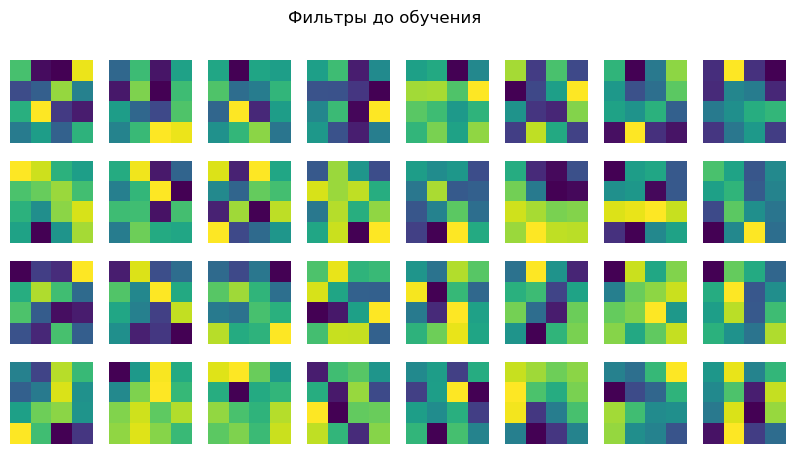

In [14]:
model.save_weights('model_weights.h5')
model.load_weights('model_weights.h5')

# Получение весов слоя Conv2D до обучения
conv_layer = model.layers[0]  # Получение первого слоя Conv2D
filters_before_training = conv_layer.get_weights()[0]

# Фильтры до обучения
plt.figure(figsize=(10, 5))
for i in range(32):
    plt.subplot(4, 8, i + 1)
    plt.imshow(filters_before_training[:, :, 0, i], cmap='viridis')
    plt.axis('off')
plt.suptitle('Фильтры до обучения')
plt.show()

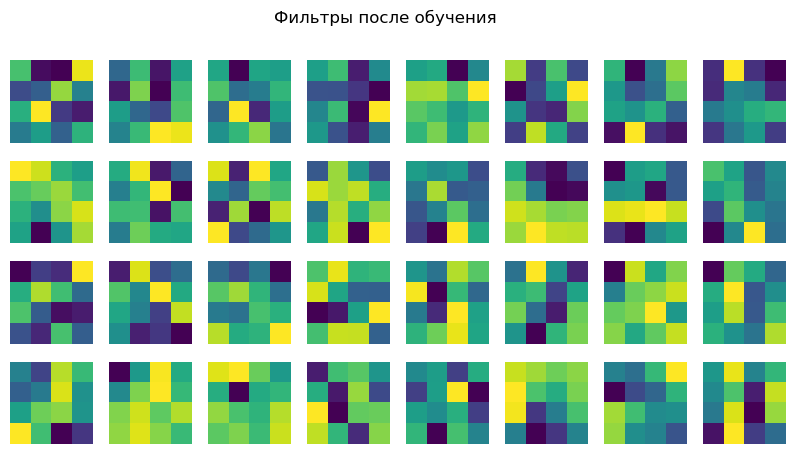

In [15]:
# Получение весов слоя Conv2D после обучения
filters_after_training = model.layers[0].get_weights()[0]

# Фильтры после обучения
plt.figure(figsize=(10, 5))
for i in range(32):
    plt.subplot(4, 8, i + 1)
    plt.imshow(filters_after_training[:, :, 0, i], cmap='viridis')
    plt.axis('off')
plt.suptitle('Фильтры после обучения')
plt.show()